In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
# import a dataset
diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2").data
diamonds2 = diamonds.copy()  # unmodified copy

In [3]:
# Load the nycflight13 dataset
flights = sm.datasets.get_rdataset("flights", "nycflights13").data
flights["time_hour"] = pd.to_datetime(flights["time_hour"], utc=False).dt.tz_convert("America/New_York")  # convert to datetime

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00-04:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00-04:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00-04:00


In [97]:
airlines = sm.datasets.get_rdataset("airlines", "nycflights13").data

In [98]:
airports = sm.datasets.get_rdataset("airports", "nycflights13").data

In [99]:
planes = sm.datasets.get_rdataset("planes", "nycflights13").data

In [100]:
weather = sm.datasets.get_rdataset("weather", "nycflights13").data
weather["time_hour"] = pd.to_datetime(weather["time_hour"], utc=False).dt.tz_convert("America/New_York")  # convert to datetime

In [130]:
# tidy data
table1 = sm.datasets.get_rdataset("table1", "tidyr").data

In [134]:
table2 = sm.datasets.get_rdataset("table2", "tidyr").data

In [135]:
table3 = sm.datasets.get_rdataset("table3", "tidyr").data

In [136]:
table4a = sm.datasets.get_rdataset("table4a", "tidyr").data

In [137]:
table4b = sm.datasets.get_rdataset("table4b", "tidyr").data

# pd.Categorical: 카테고리의 순서 지정
## defualt: alphabetical order

In [4]:
pd.Categorical(diamonds["cut"])

['Ideal', 'Premium', 'Good', 'Premium', 'Good', ..., 'Ideal', 'Good', 'Very Good', 'Premium', 'Ideal']
Length: 53940
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [5]:
diamonds2["cut"].astype("category")

0            Ideal
1          Premium
2             Good
           ...    
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [6]:
# 제일 많이 씀
diamonds["cut"] = pd.Categorical(
    diamonds["cut"],
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"],
    ordered=True
)

In [7]:
# .astype() method를 쓰려면,
diamonds["cut"] = (
    diamonds["cut"]
    .astype("category")
    .cat.set_categories(["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True)
)

# 또는
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True
)
diamonds["cut2"] = diamonds["cut"].astype(cat_type)

In [8]:
diamonds["cut"]

0            Ideal
1          Premium
2             Good
           ...    
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [9]:
diamonds["cut"].cat.categories  # categories 확인

Index(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype='object')

In [10]:
# 새로운 값인 perfect 추가하는 것도 가능
diamonds["cut2"] = pd.Categorical(
    diamonds["cut"],
    categories=["Fair", "Good", "Very Good", "Premium", "Ideal", "Perfect"],  # "Perfect" 추가
    ordered=True
)

In [11]:
diamonds.value_counts("cut2", sort=False)

cut2
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Perfect          0
Name: count, dtype: int64

In [12]:
diamonds.value_counts("cut", sort=False)

cut
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: count, dtype: int64

In [13]:
# 결과의 index는 CategoricalIndex object
diamonds.value_counts("cut", sort=False).index

CategoricalIndex(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], ordered=True, dtype='category', name='cut')

In [14]:
# group keys
diamonds.groupby("cut2")["price"].mean()

cut2
Fair        4358.76
Good        3928.86
Very Good   3981.76
Premium     4584.26
Ideal       3457.54
Perfect         NaN
Name: price, dtype: float64

In [15]:
# sort_values()에서도 카테고리 순서대로 정렬
diamonds.sort_values("cut")

,carat,cut,color,clarity,depth,table,price,x,y,z,cut2
4654,1.00,Fair,F,SI1,66.70,57.00,3669,6.07,5.99,4.02,Fair
53338,1.20,Fair,G,I1,64.40,55.00,2655,6.77,6.61,4.31,Fair
40890,0.50,Fair,E,SI1,65.00,58.00,1176,4.98,4.90,3.21,Fair
...,...,...,...,...,...,...,...,...,...,...,...
29308,0.25,Ideal,G,VS1,62.70,54.00,438,4.05,4.08,2.55,Ideal
29339,0.31,Ideal,G,VS2,59.10,57.00,698,4.48,4.45,2.64,Ideal
53939,0.75,Ideal,D,SI2,62.20,55.00,2757,5.83,5.87,3.64,Ideal


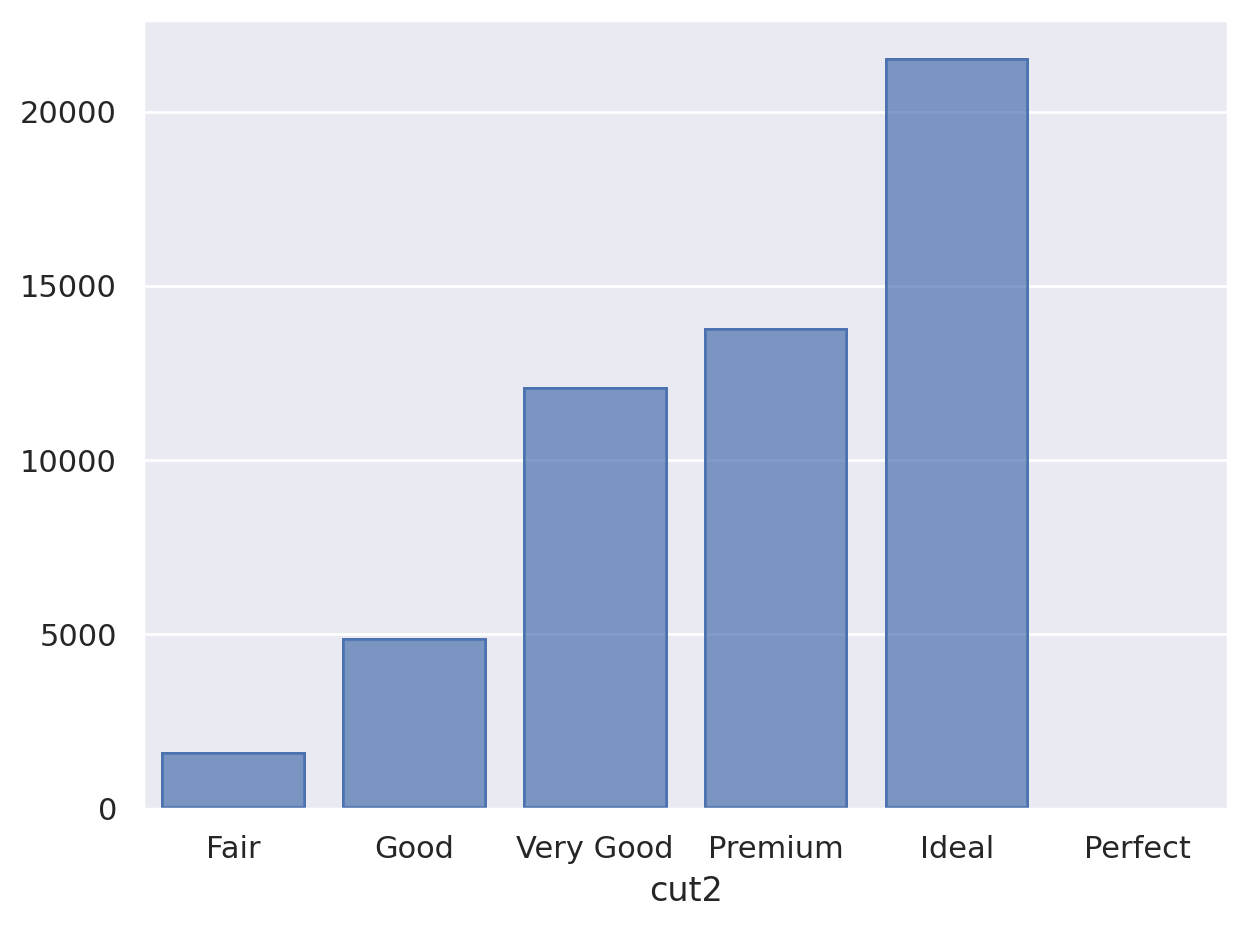

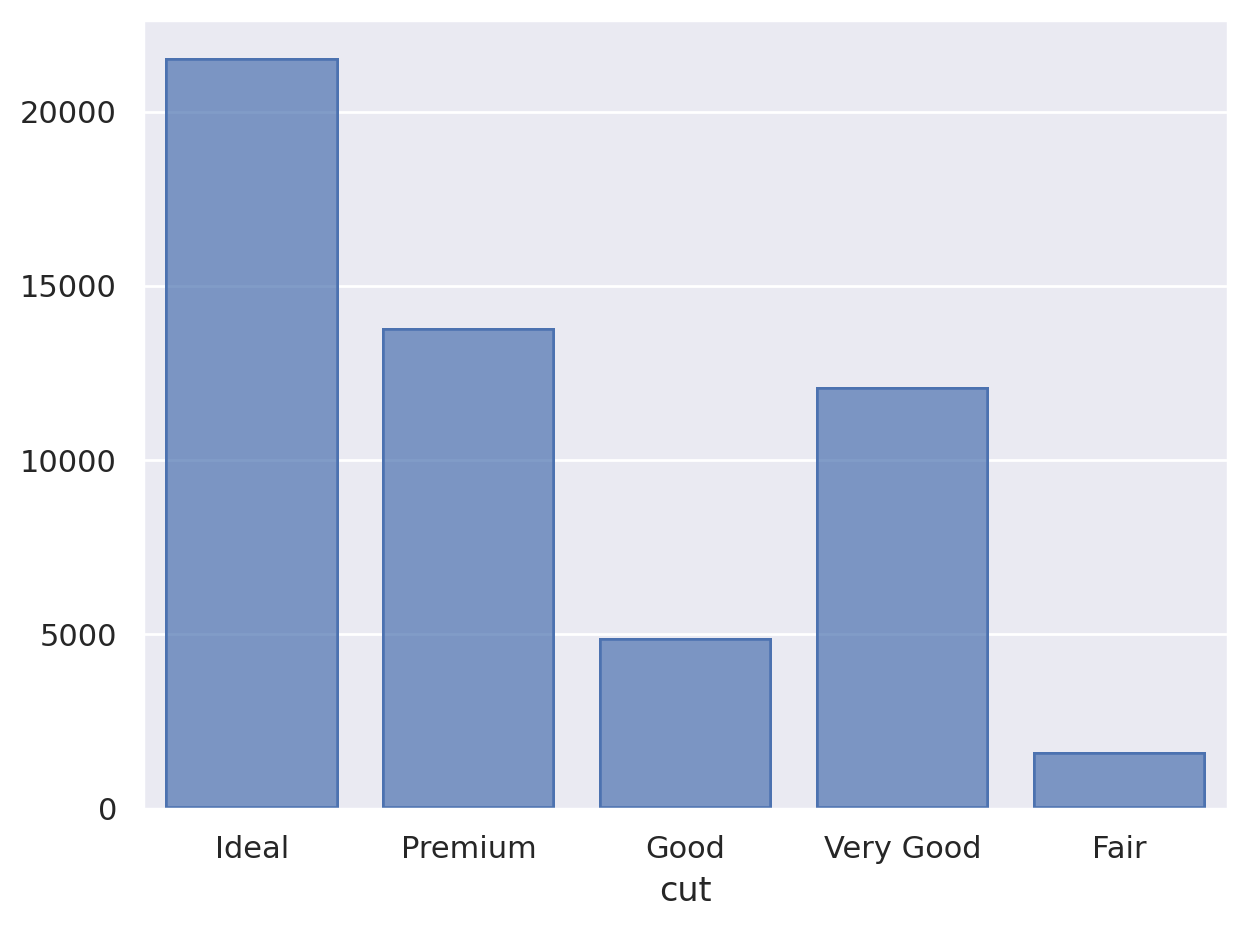

In [16]:
left = so.Plot(diamonds, x="cut2").add(so.Bar(), so.Count()).show()
right = so.Plot(diamonds2, x="cut").add(so.Bar(), so.Count()).show()  # catergorical type 아님

<Axes: xlabel='cut2', ylabel='price'>

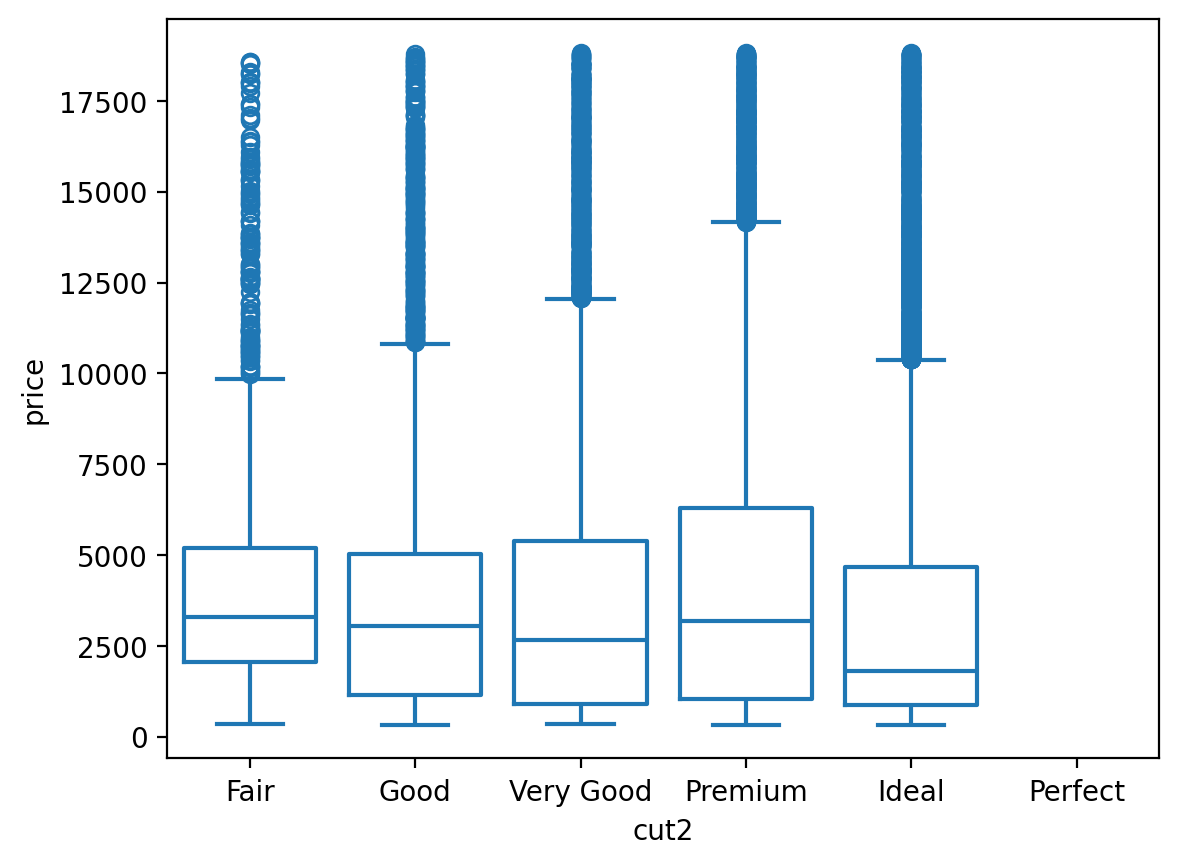

In [17]:
sns.boxplot(data=diamonds, x="cut2", y="price", fill=False)

<Axes: title={'center': 'price'}, xlabel='cut2'>

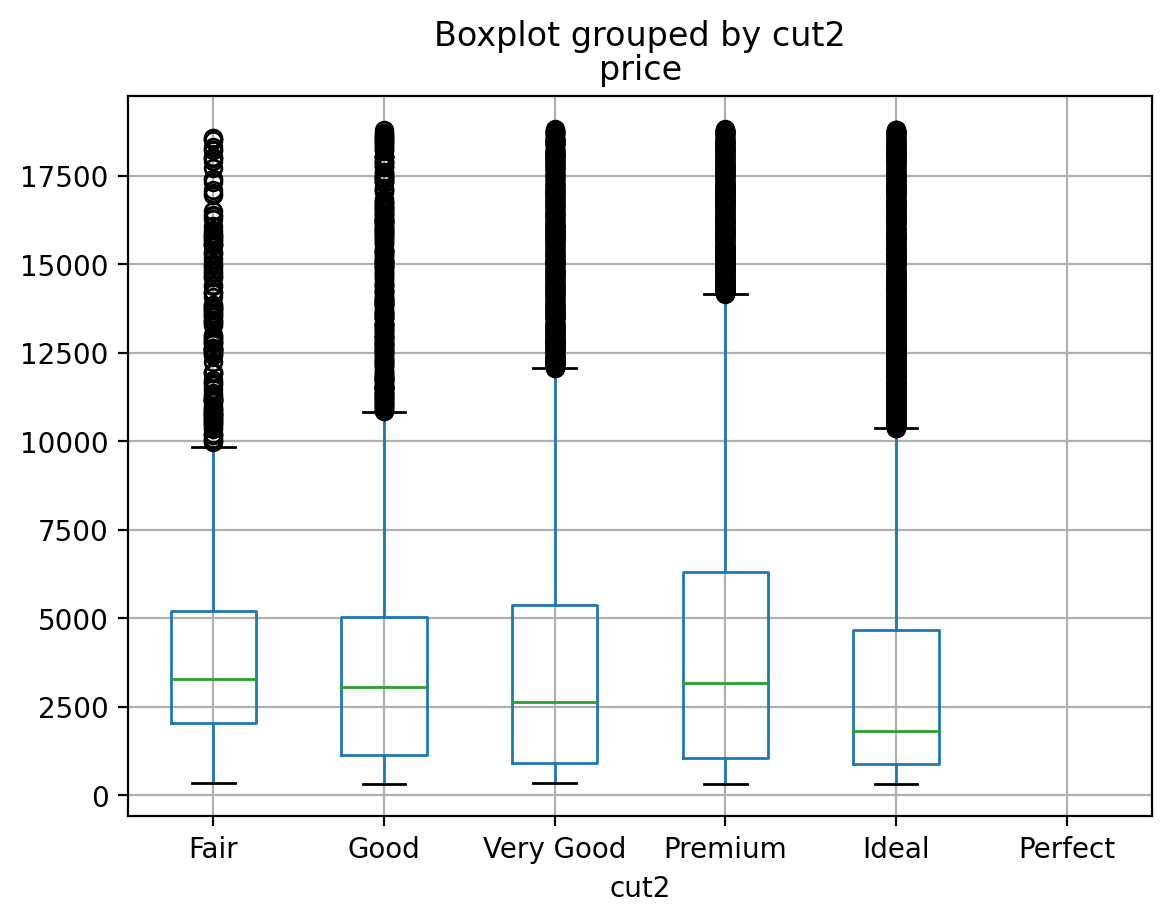

In [18]:
diamonds.boxplot("price", by="cut2")  # pandas boxplot

# pd.cut, pd.qcut: 연속변수를 카테고리화하여 범주형 변수로 변환

In [19]:
# pd.cut: 동일한 길이의 10개 구간
(
    diamonds
    .assign(carrat_cut = lambda x:pd.cut(x.carat, 10))
    .value_counts("carrat_cut", sort = False)
)

carrat_cut
(0.195, 0.681]    25155
(0.681, 1.162]    18626
(1.162, 1.643]     7129
                  ...  
(3.567, 4.048]        5
(4.048, 4.529]        2
(4.529, 5.01]         1
Name: count, Length: 10, dtype: int64

In [20]:
# 나누는 구간을 지정
(
    diamonds
    .assign(carat_cat = lambda x: pd.cut(x.carat, [0, 1, 3, 5]))
    .value_counts("carat_cat")
)

carat_cat
(0, 1]    36438
(1, 3]    17470
(3, 5]       31
Name: count, dtype: int64

In [21]:
# pd.qcut: 동일한 갯수의 관측치를 포함하도록 하는 10개의 구간; 구간의 길이가 모두 다름
(
    diamonds.assign(carat_cat = lambda x: pd.qcut(x.carat, 10))
    .value_counts("carat_cat", sort=False)
)

carat_cat
(0.199, 0.31]    6452
(0.31, 0.35]     4606
(0.35, 0.42]     5421
                 ... 
(1.01, 1.13]     4573
(1.13, 1.51]     6052
(1.51, 5.01]     4635
Name: count, Length: 10, dtype: int64

In [22]:
(
    diamonds
    .assign(carat_cat = lambda x: pd.cut(x.carat, 10))
    .assign(carat_qcat = lambda x: pd.qcut(x.carat, 10))
)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut2,carat_cat,carat_qcat
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43,Ideal,"(0.195, 0.681]","(0.199, 0.31]"
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,Premium,"(0.195, 0.681]","(0.199, 0.31]"
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,Good,"(0.195, 0.681]","(0.199, 0.31]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53937,0.70,Very Good,D,SI1,62.80,60.00,2757,5.66,5.68,3.56,Very Good,"(0.681, 1.162]","(0.53, 0.7]"
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74,Premium,"(0.681, 1.162]","(0.7, 0.9]"
53939,0.75,Ideal,D,SI2,62.20,55.00,2757,5.83,5.87,3.64,Ideal,"(0.681, 1.162]","(0.7, 0.9]"


# np.where: 조건에 해당하는 걸 찾거나, 변경하기

In [23]:
diamonds2 = diamonds.copy()
idx = diamonds['carat'] < 0.25
idx

0         True
1         True
2         True
         ...  
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

In [24]:
diamonds2["color"] = np.where(idx, "E", "H")
diamonds2

,carat,cut,color,clarity,depth,table,price,x,y,z,cut2
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43,Ideal
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31,Premium
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31,Good
...,...,...,...,...,...,...,...,...,...,...,...
53937,0.70,Very Good,H,SI1,62.80,60.00,2757,5.66,5.68,3.56,Very Good
53938,0.86,Premium,H,SI2,61.00,58.00,2757,6.15,6.12,3.74,Premium
53939,0.75,Ideal,H,SI2,62.20,55.00,2757,5.83,5.87,3.64,Ideal


In [25]:
 # str method: "I"로 시작하는지 여부 --> 나머진 X로 바꿈
np.where(diamonds2["cut2"].str.startswith("I"), "I", "X")

array(['I', 'X', 'X', ..., 'X', 'X', 'I'], dtype='<U1')

# query(): 조건에 부합하는 데이터 추출

In [26]:
flights.query('arr_delay > 120')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
119,2013,1,1,811.00,630,101.00,1047.00,830,137.00,MQ,4576,N531MQ,LGA,CLT,118.00,544,6,30,2013-01-01 06:00:00-05:00
151,2013,1,1,848.00,1835,853.00,1001.00,1950,851.00,MQ,3944,N942MQ,JFK,BWI,41.00,184,18,35,2013-01-01 18:00:00-05:00
218,2013,1,1,957.00,733,144.00,1056.00,853,123.00,UA,856,N534UA,EWR,BOS,37.00,200,7,33,2013-01-01 07:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336724,2013,9,30,2053.00,1815,158.00,2310.00,2054,136.00,EV,5292,N600QX,EWR,ATL,91.00,746,18,15,2013-09-30 18:00:00-04:00
336757,2013,9,30,2159.00,1845,194.00,2344.00,2030,194.00,9E,3320,N906XJ,JFK,BUF,50.00,301,18,45,2013-09-30 18:00:00-04:00
336763,2013,9,30,2235.00,2001,154.00,59.00,2249,130.00,B6,1083,N804JB,JFK,MCO,123.00,944,20,1,2013-09-30 20:00:00-04:00


In [27]:
flights.query('month == 1 and day == 1')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00-05:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00-05:00
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00-05:00


In [28]:
flights.query('month in [1, 2]')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136244,2013,2,28,NaN,1115,NaN,NaN,1310,NaN,MQ,4485,N725MQ,LGA,CMH,NaN,479,11,15,2013-02-28 11:00:00-05:00
136245,2013,2,28,NaN,830,NaN,NaN,1205,NaN,UA,1480,NaN,EWR,SFO,NaN,2565,8,30,2013-02-28 08:00:00-05:00
136246,2013,2,28,NaN,840,NaN,NaN,1147,NaN,UA,443,NaN,JFK,LAX,NaN,2475,8,40,2013-02-28 08:00:00-05:00


In [29]:
flights.query('arr_delay > 120 and not (origin == "JFK")')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
119,2013,1,1,811.00,630,101.00,1047.00,830,137.00,MQ,4576,N531MQ,LGA,CLT,118.00,544,6,30,2013-01-01 06:00:00-05:00
218,2013,1,1,957.00,733,144.00,1056.00,853,123.00,UA,856,N534UA,EWR,BOS,37.00,200,7,33,2013-01-01 07:00:00-05:00
268,2013,1,1,1114.00,900,134.00,1447.00,1222,145.00,UA,1086,N76502,LGA,IAH,248.00,1416,9,0,2013-01-01 09:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336529,2013,9,30,1738.00,1529,129.00,1906.00,1649,137.00,EV,4580,N12563,EWR,MKE,110.00,725,15,29,2013-09-30 15:00:00-04:00
336668,2013,9,30,1951.00,1649,182.00,2157.00,1903,174.00,EV,4294,N13988,EWR,SAV,95.00,708,16,49,2013-09-30 16:00:00-04:00
336724,2013,9,30,2053.00,1815,158.00,2310.00,2054,136.00,EV,5292,N600QX,EWR,ATL,91.00,746,18,15,2013-09-30 18:00:00-04:00


In [30]:
flights.query('dep_time < sched_dep_time')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01 05:00:00-05:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00-05:00
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336766,2013,9,30,2240.00,2250,-10.00,2347.00,7,-20.00,B6,2002,N281JB,JFK,BUF,52.00,301,22,50,2013-09-30 22:00:00-04:00
336767,2013,9,30,2241.00,2246,-5.00,2345.00,1,-16.00,B6,486,N346JB,JFK,ROC,47.00,264,22,46,2013-09-30 22:00:00-04:00
336769,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,745,N516JB,JFK,PSE,196.00,1617,23,59,2013-09-30 23:00:00-04:00


In [31]:
flights.query('arr_delay + dep_delay < 0')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
3,2013,1,1,544.00,545,-1.00,1004.00,1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01 05:00:00-05:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00-05:00
7,2013,1,1,557.00,600,-3.00,709.00,723,-14.00,EV,5708,N829AS,LGA,IAD,53.00,229,6,0,2013-01-01 06:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336766,2013,9,30,2240.00,2250,-10.00,2347.00,7,-20.00,B6,2002,N281JB,JFK,BUF,52.00,301,22,50,2013-09-30 22:00:00-04:00
336767,2013,9,30,2241.00,2246,-5.00,2345.00,1,-16.00,B6,486,N346JB,JFK,ROC,47.00,264,22,46,2013-09-30 22:00:00-04:00
336769,2013,9,30,2349.00,2359,-10.00,325.00,350,-25.00,B6,745,N516JB,JFK,PSE,196.00,1617,23,59,2013-09-30 23:00:00-04:00


In [32]:
# dep_delay는 NaN 값이 아니고, arr_delay는 NaN 값인 경우
flights.query('not dep_delay.isna() and arr_delay.isna()')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,2013,1,1,1525.00,1530,-5.00,1934.00,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,2013-01-01 15:00:00-05:00
477,2013,1,1,1528.00,1459,29.00,2002.00,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,2013-01-01 14:00:00-05:00
615,2013,1,1,1740.00,1745,-5.00,2158.00,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,2013-01-01 17:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334495,2013,9,28,1214.00,1225,-11.00,1801.00,1510,NaN,AA,300,N488AA,EWR,DFW,NaN,1372,12,25,2013-09-28 12:00:00-04:00
335534,2013,9,29,1734.00,1711,23.00,2159.00,2020,NaN,UA,327,N463UA,EWR,PDX,NaN,2434,17,11,2013-09-29 17:00:00-04:00
335805,2013,9,30,559.00,600,-1.00,NaN,715,NaN,WN,464,N411WN,EWR,MDW,NaN,711,6,0,2013-09-30 06:00:00-04:00


In [33]:
# 외부 변수 참조
delay_cutoff = 120
flights.query('arr_delay > @delay_cutoff')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
119,2013,1,1,811.00,630,101.00,1047.00,830,137.00,MQ,4576,N531MQ,LGA,CLT,118.00,544,6,30,2013-01-01 06:00:00-05:00
151,2013,1,1,848.00,1835,853.00,1001.00,1950,851.00,MQ,3944,N942MQ,JFK,BWI,41.00,184,18,35,2013-01-01 18:00:00-05:00
218,2013,1,1,957.00,733,144.00,1056.00,853,123.00,UA,856,N534UA,EWR,BOS,37.00,200,7,33,2013-01-01 07:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336724,2013,9,30,2053.00,1815,158.00,2310.00,2054,136.00,EV,5292,N600QX,EWR,ATL,91.00,746,18,15,2013-09-30 18:00:00-04:00
336757,2013,9,30,2159.00,1845,194.00,2344.00,2030,194.00,9E,3320,N906XJ,JFK,BUF,50.00,301,18,45,2013-09-30 18:00:00-04:00
336763,2013,9,30,2235.00,2001,154.00,59.00,2249,130.00,B6,1083,N804JB,JFK,MCO,123.00,944,20,1,2013-09-30 20:00:00-04:00


In [34]:
# 외부 함수 참조
def cut_off(df):
    return df["dep_delay"].min()

flights.query('arr_delay < @cut_off(@flights)')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
694,2013,1,1,1859.00,1900,-1.00,2151.00,2238,-47.00,DL,1967,N329NW,JFK,MIA,150.00,1089,19,0,2013-01-01 19:00:00-05:00
696,2013,1,1,1904.00,1905,-1.00,2139.00,2227,-48.00,DL,2159,N3758Y,JFK,MCO,133.00,944,19,5,2013-01-01 19:00:00-05:00
860,2013,1,2,559.00,601,-2.00,809.00,901,-52.00,UA,402,N484UA,EWR,LAS,289.00,2227,6,1,2013-01-02 06:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336634,2013,9,30,1913.00,1919,-6.00,2149.00,2234,-45.00,B6,71,N615JB,JFK,SLC,254.00,1990,19,19,2013-09-30 19:00:00-04:00
336638,2013,9,30,1918.00,1925,-7.00,2152.00,2248,-56.00,DL,498,N378NW,JFK,SAT,190.00,1587,19,25,2013-09-30 19:00:00-04:00
336722,2013,9,30,2052.00,2054,-2.00,2306.00,2358,-52.00,B6,1295,N588JB,JFK,AUS,175.00,1521,20,54,2013-09-30 20:00:00-04:00


# sort_values(): 정렬
## default: ascending=True (오름차순)
## index 순서가 바뀌는데, 이를 reset하려면 .sort_values(ignore_index = True)

In [35]:
# "year", "month", "day", "dep_time" 순서대로 내림차순으로 정렬
flights.sort_values(by=["year", "month", "day", "dep_time"], ascending=False)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
111279,2013,12,31,2356.00,2359,-3.00,436.00,445,-9.00,B6,745,N665JB,JFK,PSE,200.00,1617,23,59,2013-12-31 23:00:00-05:00
111278,2013,12,31,2355.00,2359,-4.00,430.00,440,-10.00,B6,1503,N509JB,JFK,SJU,195.00,1598,23,59,2013-12-31 23:00:00-05:00
111277,2013,12,31,2332.00,2245,47.00,58.00,3,55.00,B6,486,N334JB,JFK,ROC,60.00,264,22,45,2013-12-31 22:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-01 19:00:00-05:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 15:00:00-05:00
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,2013-01-01 06:00:00-05:00


In [36]:
flights.sort_values(by=["year", "month", "day", "dep_time"])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,2013-12-31 16:00:00-05:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,2013-12-31 06:00:00-05:00
111295,2013,12,31,NaN,830,NaN,NaN,1154,NaN,UA,443,NaN,JFK,LAX,NaN,2475,8,30,2013-12-31 08:00:00-05:00


In [37]:
# "dep_time"은 내림차순으로, "arr_delay"는 오름차순으로
flights.sort_values(by=["dep_time", "arr_delay"], ascending=[False, True])

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
150301,2013,3,15,2400.00,2359,1.00,324.00,338,-14.00,B6,727,N636JB,JFK,BQN,186.00,1576,23,59,2013-03-15 23:00:00-04:00
87893,2013,12,5,2400.00,2359,1.00,427.00,440,-13.00,B6,1503,N587JB,JFK,SJU,182.00,1598,23,59,2013-12-05 23:00:00-05:00
212941,2013,5,21,2400.00,2359,1.00,339.00,350,-11.00,B6,739,N527JB,JFK,PSE,199.00,1617,23,59,2013-05-21 23:00:00-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00-04:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00-04:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00-04:00


In [38]:
(
    flights
    .query('dep_delay <= 10 and dep_delay >= -10')
    .sort_values('arr_delay', ascending=False)
)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55985,2013,11,1,658.00,700,-2.00,1329.00,1015,194.00,VX,399,N629VA,JFK,LAX,336.00,2475,7,0,2013-11-01 07:00:00-04:00
181270,2013,4,18,558.00,600,-2.00,1149.00,850,179.00,AA,707,N3EXAA,LGA,DFW,234.00,1389,6,0,2013-04-18 06:00:00-04:00
256340,2013,7,7,1659.00,1700,-1.00,2050.00,1823,147.00,US,2183,N948UW,LGA,DCA,64.00,214,17,0,2013-07-07 17:00:00-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334354,2013,9,28,847.00,839,8.00,1130.00,959,NaN,EV,4510,N14542,EWR,MKE,NaN,725,8,39,2013-09-28 08:00:00-04:00
334412,2013,9,28,1010.00,1020,-10.00,1344.00,1222,NaN,EV,4412,N12175,EWR,DSM,NaN,1017,10,20,2013-09-28 10:00:00-04:00
335805,2013,9,30,559.00,600,-1.00,NaN,715,NaN,WN,464,N411WN,EWR,MDW,NaN,711,6,0,2013-09-30 06:00:00-04:00


# nlargest(): 값이 높은 것들 정렬 후 추출
## keep = "all" -- 중복값 모두 출력
## keep = "first" -- 중복된 값 중에서 첫 번째로 나타나는 값을 선택
## keep = "last" -- 중복된 값 중에서 마지막으로 나타나는 값을 선택

In [39]:
# 순서로 정렬
flights.nlargest(3, columns=["year", "month", "day", "dep_time"], keep="all")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
111279,2013,12,31,2356.00,2359,-3.00,436.00,445,-9.00,B6,745,N665JB,JFK,PSE,200.00,1617,23,59,2013-12-31 23:00:00-05:00
111278,2013,12,31,2355.00,2359,-4.00,430.00,440,-10.00,B6,1503,N509JB,JFK,SJU,195.00,1598,23,59,2013-12-31 23:00:00-05:00
111277,2013,12,31,2332.00,2245,47.00,58.00,3,55.00,B6,486,N334JB,JFK,ROC,60.00,264,22,45,2013-12-31 22:00:00-05:00


# unique(): 유일한 값 찾기
## + nunique(): 유일한 값의 개수 찾기

In [40]:
flights["origin"].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [41]:
flights["origin"].nunique()

3

# value_counts(): 고유값의 개수 세주기
## default: dropna=True

In [42]:
flights[["origin", "dest"]].value_counts(sort=False) # Series

origin  dest
EWR     ALB      439
        ANC        8
        ATL     5022
                ... 
LGA     TVC       77
        TYS      308
        XNA      745
Name: count, Length: 224, dtype: int64

In [43]:
# reset_index로 데이터프레임 형식 만들고, values_count로 센 것을 n이라는 열로 저장
flights[["origin", "dest"]].value_counts(sort=False).reset_index(name="n")

,origin,dest,n
0,EWR,ALB,439
1,EWR,ANC,8
2,EWR,ATL,5022
...,...,...,...
221,LGA,TVC,77
222,LGA,TYS,308
223,LGA,XNA,745


# rename(): column이나 index 이름 바꾸기

In [44]:
flights.rename(
    columns = {'dep_time': "det_t", "arr_time": "arr_t"}
)

,year,month,day,det_t,sched_dep_time,dep_delay,arr_t,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00-04:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00-04:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00-04:00


In [45]:
# 인덱스 rename도 가능
flights.rename(
    index={0: "a", 1: "b"},
).head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
a,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
b,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00


In [46]:
# 첫 문자 대문자로
flights.rename(str.capitalize, axis="columns").head(3)  # axis=1

,Year,Month,Day,Dep_time,Sched_dep_time,Dep_delay,Arr_time,Sched_arr_time,Arr_delay,Carrier,Flight,Tailnum,Origin,Dest,Air_time,Distance,Hour,Minute,Time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00


In [47]:
# 임의의 함수가 적용됨
flights.rename(lambda x: x[:3], axis="columns")

,yea,mon,day,dep,sch,dep,arr,sch,arr,car,fli,tai,ori,des,air,dis,hou,min,tim
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00-05:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00-05:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00-04:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00-04:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00-04:00


# assign(): 데이터프레임에 새로운 열(column)을 추가할 때 사용

In [48]:
cols = ["year", "month", "day", "distance", "air_time"] + \
        [col for col in flights.columns if col.endswith("delay")]  # string method .endswith
flights_sml = flights[cols].copy()
flights_sml

,year,month,day,distance,air_time,dep_delay,arr_delay
0,2013,1,1,1400,227.00,2.00,11.00
1,2013,1,1,1416,227.00,4.00,20.00
2,2013,1,1,1089,160.00,2.00,33.00
...,...,...,...,...,...,...,...
336773,2013,9,30,764,NaN,NaN,NaN
336774,2013,9,30,419,NaN,NaN,NaN
336775,2013,9,30,431,NaN,NaN,NaN


In [49]:
# 새로 만들어진 변수는 맨 뒤로
flights_sml.assign(
    gain=lambda x: x.dep_delay - x.arr_delay,   # x: DataFrame, flights_sml
    speed=lambda x: x.distance / x.air_time * 60
)

,year,month,day,distance,air_time,dep_delay,arr_delay,gain,speed
0,2013,1,1,1400,227.00,2.00,11.00,-9.00,370.04
1,2013,1,1,1416,227.00,4.00,20.00,-16.00,374.27
2,2013,1,1,1089,160.00,2.00,33.00,-31.00,408.38
...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,764,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,419,NaN,NaN,NaN,NaN,NaN
336775,2013,9,30,431,NaN,NaN,NaN,NaN,NaN


In [50]:
# 직접 DataFrame 참조할 수도 있음
flights_sml.assign(
gain=lambda x: flights_sml['dep_delay'] - flights_sml['arr_delay'],
    speed=flights_sml["distance"] / flights_sml["air_time"] * 60
)

,year,month,day,distance,air_time,dep_delay,arr_delay,gain,speed
0,2013,1,1,1400,227.00,2.00,11.00,-9.00,370.04
1,2013,1,1,1416,227.00,4.00,20.00,-16.00,374.27
2,2013,1,1,1089,160.00,2.00,33.00,-31.00,408.38
...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,764,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,419,NaN,NaN,NaN,NaN,NaN
336775,2013,9,30,431,NaN,NaN,NaN,NaN,NaN


In [51]:
# 앞에서 만든 변수나 함수를 이용할 수 있음
flights_sml.assign(
    gain=lambda x: x.dep_delay - x.arr_delay,
    hours=lambda x: x.air_time / 60,
    gain_per_hour=lambda x: x.gain / x.hours,
    rounded=lambda x: np.round(x.gain_per_hour, 1)  # use a numpy function
)

,year,month,day,distance,air_time,dep_delay,arr_delay,gain,hours,gain_per_hour,rounded
0,2013,1,1,1400,227.00,2.00,11.00,-9.00,3.78,-2.38,-2.40
1,2013,1,1,1416,227.00,4.00,20.00,-16.00,3.78,-4.23,-4.20
2,2013,1,1,1089,160.00,2.00,33.00,-31.00,2.67,-11.62,-11.60
...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336775,2013,9,30,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Find the fastest flights
(
    flights_sml
    .assign(speed=lambda x: x.distance / x.air_time)
    .sort_values(by="speed", ascending=False)
    .head(5)
)

,year,month,day,distance,air_time,dep_delay,arr_delay,speed
216447,2013,5,25,762,65.00,9.00,-14.00,11.72
251999,2013,7,2,1008,93.00,45.00,26.00,10.84
205388,2013,5,13,594,55.00,15.00,-1.00,10.80
157516,2013,3,23,748,70.00,4.00,2.00,10.69
10223,2013,1,12,1035,105.00,-1.00,-28.00,9.86


# groupby(): 데이터를 그룹으로 나누어 분석할 수 있게 해줌
## .count(), .sum(), .mean(), .min(), .max()과 같은 통계치를 구하는 methods와 함께 자주 활용됨
## .size: group의 사이즈, 열의 개수, value_counts와 유사하게 쓰일 수 있음
## as_index=False: grouping 변수들을 index가 아닌 columns으로

In [53]:
flights.groupby("month")  # “GroupBy” object

In [54]:
flights_sml.groupby("month").mean()

,year,day,distance,air_time,dep_delay,arr_delay
month,,,,,,
1,2013.00,15.99,1006.84,154.19,10.04,6.13
2,2013.00,14.74,1000.98,151.35,10.82,5.61
3,2013.00,16.00,1011.99,149.08,13.23,5.81
...,...,...,...,...,...,...
10,2013.00,15.98,1038.88,148.89,6.24,-0.17
11,2013.00,15.29,1050.31,155.47,5.44,0.46
12,2013.00,15.72,1064.66,162.59,16.58,14.87


In [55]:
# 보통은 다음과 같이 특정 columns을 선택
flights.groupby("month")["dep_delay"]  # [["dep_delay"]] 처럼 list로 입력하면 DataFrameGroupBy object

In [56]:
flights.groupby("month")["dep_delay"].mean()  # Series GroupBy object에 적용된 결과는 Series

month
1    10.04
2    10.82
3    13.23
      ... 
10    6.24
11    5.44
12   16.58
Name: dep_delay, Length: 12, dtype: float64

In [57]:
flights.groupby("month")[["dep_delay", "arr_delay"]].mean().head(3)

,dep_delay,arr_delay
month,,
1,10.04,6.13
2,10.82,5.61
3,13.23,5.81


In [58]:
# Multi-index의 level을 drop하려면 droplevel()
flights.groupby(["month", "day"])["arr_delay"].nsmallest(1).droplevel(2)

month  day
1      1     -48.00
       2     -59.00
       3     -65.00
              ...  
12     29    -60.00
       30    -45.00
       31    -44.00
Name: arr_delay, Length: 365, dtype: float64

In [59]:
flights.groupby(["origin", "dest"])["arr_delay"].count()

origin  dest
EWR     ALB      418
        ANC        8
        ATL     4876
                ... 
LGA     TVC       73
        TYS      265
        XNA      709
Name: arr_delay, Length: 224, dtype: int64

In [60]:
flights.groupby(["month", "day"])["arr_delay"].mean()

month  day
1      1     12.65
       2     12.69
       3      5.73
              ... 
12     29    18.76
       30    10.06
       31     6.21
Name: arr_delay, Length: 365, dtype: float64

In [61]:
flights.groupby(["month", "day"], as_index=False)["arr_delay"].mean().head(3)

,month,day,arr_delay
0,1,1,12.65
1,1,2,12.69
2,1,3,5.73


In [62]:
flights.groupby("dest").size()  # .size(): group의 사이즈/열의 갯수

dest
ABQ     254
ACK     265
ALB     439
       ... 
TVC     101
TYS     631
XNA    1036
Length: 105, dtype: int64

In [63]:
flights.groupby("tailnum", dropna=False).size()  # groupby는 기본적으로 NA 무시

tailnum
D942DN       4
N0EGMQ     371
N10156     153
          ... 
N999DN      61
N9EAMQ     248
NaN       2512
Length: 4044, dtype: int64

In [64]:
# 좀 더 복잡한 groupby filtering은 이후 apply를 이용
flights.groupby(["year", "month", "day"]).filter(lambda x: x["arr_delay"].mean() < 0)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2699,2013,1,4,25.00,2359,26.00,505.00,442,23.00,B6,707,N554JB,JFK,SJU,194.00,1598,23,59,2013-01-04 23:00:00-05:00
2700,2013,1,4,106.00,2245,141.00,201.00,2356,125.00,B6,608,N192JB,JFK,PWM,44.00,273,22,45,2013-01-04 22:00:00-05:00
2701,2013,1,4,456.00,500,-4.00,631.00,650,-19.00,US,1030,N186US,EWR,CLT,77.00,529,5,0,2013-01-04 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00-04:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00-04:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00-04:00


# agg(): 배열에서 스칼라 값을 생성하는 데이터 변환

In [65]:
# 모두 동일
flights_sml.groupby("month").mean()
flights_sml.groupby("month").agg("mean")  # function names
flights_sml.groupby("month").agg(np.mean)  # numpy functions
flights_sml.groupby("month").agg(lambda x: x.sum() / x.count())  # general functions; not optimized!

,year,day,distance,air_time,dep_delay,arr_delay
month,,,,,,
1,2013.00,15.99,1006.84,154.19,10.04,6.13
2,2013.00,14.74,1000.98,151.35,10.82,5.61
3,2013.00,16.00,1011.99,149.08,13.23,5.81
...,...,...,...,...,...,...
10,2013.00,15.98,1038.88,148.89,6.24,-0.17
11,2013.00,15.29,1050.31,155.47,5.44,0.46
12,2013.00,15.72,1064.66,162.59,16.58,14.87


In [66]:
# Series에 string으로 함수 적용
flights_sml.groupby("month")["arr_delay"].agg("mean")

month
1     6.13
2     5.61
3     5.81
      ... 
10   -0.17
11    0.46
12   14.87
Name: arr_delay, Length: 12, dtype: float64

In [67]:
# DataFrame에 적용해서 결과물: DataFrame
flights_sml.groupby("month")[["arr_delay"]].agg("mean")

,arr_delay
month,
1,6.13
2,5.61
3,5.81
...,...
10,-0.17
11,0.46
12,14.87


In [68]:
flights.groupby("month")["dep_delay"].agg(["mean", "count"])

,mean,count
month,,
1,10.04,26483
2,10.82,23690
3,13.23,27973
...,...,...
10,6.24,28653
11,5.44,27035
12,16.58,27110


In [69]:
# DataFrame Groupby object의 경우 column 별로 적용
flights_sml.groupby("month")[["arr_delay", "dep_delay"]].agg("mean")

,arr_delay,dep_delay
month,,
1,6.13,10.04
2,5.61,10.82
3,5.81,13.23
...,...,...
10,-0.17,6.24
11,0.46,5.44
12,14.87,16.58


In [70]:
flights_sml.groupby("month")[["arr_delay", "dep_delay"]].agg(["mean", "count"])

arr_delay        dep_delay       
           mean  count      mean  count
month                                  
1          6.13  26398     10.04  26483
2          5.61  23611     10.82  23690
3          5.81  27902     13.23  27973
...         ...    ...       ...    ...
10        -0.17  28618      6.24  28653
11         0.46  26971      5.44  27035
12        14.87  27020     16.58  27110

[12 rows x 4 columns]

In [71]:
# 컬럼 별로 다른 함수를 적용하고자 할 때 (컬럼 이름을 지정)
flights_agg = (
    flights.groupby("month")
    .agg(
        air_min=("air_time", "min"),  # 컬럼 이름 지정 = (컬럼, 함수)
        air_max=("air_time", "max"),
        dep_mean=("dep_delay", "mean"),
        arr_median=("arr_delay", "median"),
    )
)

flights_agg

,air_min,air_max,dep_mean,arr_median
month,,,,
1,20.00,667.00,10.04,-3.00
2,21.00,691.00,10.82,-3.00
3,21.00,695.00,13.23,-6.00
...,...,...,...,...
10,23.00,642.00,6.24,-7.00
11,24.00,676.00,5.44,-6.00
12,21.00,661.00,16.58,2.00


In [72]:
# 컬럼별 다른 함수를 적용하는 다른 방식: dictionary
flights_agg = flights.groupby("month").agg({
    "air_time": ["min", "max"],
    "dep_delay": "mean",
    "arr_delay": "median"
})

In [73]:
# MultiIndex를 collapse하는 팁

flights_agg.columns
# MultiIndex([( 'air_time',    'min'),
#             ( 'air_time',    'max'),
#             ('dep_delay',   'mean'),
#             ('arr_delay', 'median')],
#            )

flights_agg.columns = ['_'.join(col_agg) for col_agg in flights_agg.columns]
flights_agg.head(3)

,air_time_min,air_time_max,dep_delay_mean,arr_delay_median
month,,,,
1,20.00,667.00,10.04,-3.00
2,21.00,691.00,10.82,-3.00
3,21.00,695.00,13.23,-6.00


In [74]:
# agg()에는 custom function을 pass할 수 있음
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped_dist = flights_sml.groupby(["month", "day"])["distance"]

grouped_dist.agg(["std", peak_to_peak])  # a list of functions

std  peak_to_peak
month day                     
1     1   727.73          4889
      2   721.72          4889
      3   714.95          4903
...          ...           ...
12    29  728.78          4887
      30  723.88          4887
      31  731.36          4887

[365 rows x 2 columns]

In [75]:
# Naming a function as a tuple
grouped_dist.agg([("sd", "std"), ("range", peak_to_peak)])

sd  range
month day              
1     1   727.73   4889
      2   721.72   4889
      3   714.95   4903
...          ...    ...
12    29  728.78   4887
      30  723.88   4887
      31  731.36   4887

[365 rows x 2 columns]

# transform(): 함수는 그룹별 변환을 수행하거나 열별 변환을 수행할 때 사용
## 앞서 group별로 통계치가 summary되어 reduced 데이터프레임으로 변형됐다면, transform()은 group별로 얻은 통계치가 원래 데이터의 형태를 그대로 보존하면서 출력

In [76]:
# month로 reduce됨.
flights_sml.groupby(["month"])["arr_delay"].mean()

month
1     6.13
2     5.61
3     5.81
      ... 
10   -0.17
11    0.46
12   14.87
Name: arr_delay, Length: 12, dtype: float64

In [77]:
grouped_delay = flights_sml.groupby(["month"])["arr_delay"].transform("mean")
grouped_delay

0         6.13
1         6.13
2         6.13
          ... 
336773   -4.02
336774   -4.02
336775   -4.02
Name: arr_delay, Length: 336776, dtype: float64

In [78]:
flights_sml["monthly_delay"] = grouped_delay
flights_sml

,year,month,day,distance,air_time,dep_delay,arr_delay,monthly_delay
0,2013,1,1,1400,227.00,2.00,11.00,6.13
1,2013,1,1,1416,227.00,4.00,20.00,6.13
2,2013,1,1,1089,160.00,2.00,33.00,6.13
...,...,...,...,...,...,...,...,...
336773,2013,9,30,764,NaN,NaN,NaN,-4.02
336774,2013,9,30,419,NaN,NaN,NaN,-4.02
336775,2013,9,30,431,NaN,NaN,NaN,-4.02


In [79]:
dest_size =  flights.groupby("dest").transform("size")
dest_size

# 또는 flights.groupby("dest")["dest"].transform("count")

0          7198
1          7198
2         11728
          ...  
336773     6333
336774     4573
336775     8163
Length: 336776, dtype: int64

In [80]:
# 1년에 10000편 이상 운항편이 있는 도착지에 대한 항공편
flights[dest_size >= 10000]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00-05:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00-05:00
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01 05:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336762,2013,9,30,2233.00,2113,80.00,112.00,30,42.00,UA,471,N578UA,EWR,SFO,318.00,2565,21,13,2013-09-30 21:00:00-04:00
336763,2013,9,30,2235.00,2001,154.00,59.00,2249,130.00,B6,1083,N804JB,JFK,MCO,123.00,944,20,1,2013-09-30 20:00:00-04:00
336768,2013,9,30,2307.00,2255,12.00,2359.00,2358,1.00,B6,718,N565JB,JFK,BOS,33.00,187,22,55,2013-09-30 22:00:00-04:00


In [81]:
# rank() 사용하여 하루 중 출발 지연이 가장 늦은 두 항공편들을 매일 각각 구하면,
def get_ranks(group):
    return group.rank(ascending=False, method="min")


delay_rank = flights.groupby(['month', 'day'])['dep_delay'].transform(get_ranks)
delay_rank

0        302.00
1        269.00
2        302.00
          ...  
336773      NaN
336774      NaN
336775      NaN
Name: dep_delay, Length: 336776, dtype: float64

In [82]:
flights[delay_rank < 3].head(6)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.00,1835,853.00,1001.00,1950,851.00,MQ,3944,N942MQ,JFK,BWI,41.00,184,18,35,2013-01-01 18:00:00-05:00
834,2013,1,1,2343.00,1724,379.00,314.00,1938,456.00,EV,4321,N21197,EWR,MCI,222.00,1092,17,24,2013-01-01 17:00:00-05:00
1440,2013,1,2,1607.00,1030,337.00,2003.00,1355,368.00,AA,179,N324AA,JFK,SFO,346.00,2586,10,30,2013-01-02 10:00:00-05:00
1749,2013,1,2,2131.00,1512,379.00,2340.00,1741,359.00,UA,488,N593UA,LGA,DEN,228.00,1620,15,12,2013-01-02 15:00:00-05:00
2598,2013,1,3,2008.00,1540,268.00,2339.00,1909,270.00,DL,2027,N338NW,JFK,FLL,158.00,1069,15,40,2013-01-03 15:00:00-05:00
2637,2013,1,3,2056.00,1605,291.00,2239.00,1754,285.00,9E,3459,N928XJ,JFK,BNA,125.00,765,16,5,2013-01-03 16:00:00-05:00


In [83]:
# air_time 변수 Normalize
dest_air = flights.groupby("dest")["air_time"]

def normalize(x):
    return (x - x.mean()) / x.std()

dest_air.transform(normalize)

0        1.73
1        1.73
2        0.61
         ... 
336773    NaN
336774    NaN
336775    NaN
Name: air_time, Length: 336776, dtype: float64

# apply():  함수는 사용자가 지정한 함수를 데이터프레임의 각 행 또는 열에 적용할 때 사용

In [84]:
tips = sns.load_dataset("tips")
tips = tips.assign(tip_pct = lambda x: x.tip / x.total_bill)
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17


In [85]:
def top(df, n = 5, column = "tip_pct"):
    return df.sort_values(by = column, ascending = False)[:n]

top(tips, n = 4)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.71
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.42
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.33
232,11.61,3.39,Male,No,Sat,Dinner,2,0.29


In [86]:
# DataFrame Groupby ojbect에 적용
tips.groupby("time", observed=False).apply(top)

total_bill  tip     sex smoker   day    time  size  tip_pct
time                                                                   
Lunch  149        7.51 2.00    Male     No  Thur   Lunch     2     0.27
       221       13.42 3.48  Female    Yes   Fri   Lunch     2     0.26
       194       16.58 4.00    Male    Yes  Thur   Lunch     2     0.24
...                ...  ...     ...    ...   ...     ...   ...      ...
Dinner 67         3.07 1.00  Female    Yes   Sat  Dinner     1     0.33
       232       11.61 3.39    Male     No   Sat  Dinner     2     0.29
       183       23.17 6.50    Male    Yes   Sun  Dinner     4     0.28

[10 rows x 8 columns]

In [87]:
tips.groupby(["time", "day"], observed=False).apply(top, n=1, column="total_bill")

total_bill   tip     sex smoker   day    time  size  tip_pct
time   day                                                                   
Lunch  Thur 197       43.11  5.00  Female    Yes  Thur   Lunch     4     0.12
       Fri  225       16.27  2.50  Female    Yes   Fri   Lunch     2     0.15
Dinner Thur 243       18.78  3.00  Female     No  Thur  Dinner     2     0.16
       Fri  95        40.17  4.73    Male    Yes   Fri  Dinner     4     0.12
       Sat  170       50.81 10.00    Male    Yes   Sat  Dinner     3     0.20
       Sun  156       48.17  5.00    Male     No   Sun  Dinner     6     0.10

In [88]:
def apply_mean(df):
    return df.mean()

tips.groupby("time", observed=False)[["total_bill", "tip"]].apply(apply_mean)  # .apply("mean")과 동일

,total_bill,tip
time,,
Lunch,17.17,2.73
Dinner,20.80,3.10


In [89]:
def my_format(x):
    return f"{x:.1f}"

tips_num = tips.select_dtypes("number")

# element-wise, DataFrame method
tips_num.applymap(my_format)

,total_bill,tip,size,tip_pct
0,17.0,1.0,2.0,0.1
1,10.3,1.7,3.0,0.2
2,21.0,3.5,3.0,0.2
...,...,...,...,...
241,22.7,2.0,2.0,0.1
242,17.8,1.8,2.0,0.1
243,18.8,3.0,2.0,0.2


In [90]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [91]:
tips_num

,total_bill,tip,size,tip_pct
0,16.99,1.01,2,0.06
1,10.34,1.66,3,0.16
2,21.01,3.50,3,0.17
...,...,...,...,...
241,22.67,2.00,2,0.09
242,17.82,1.75,2,0.10
243,18.78,3.00,2,0.16


In [92]:
# column-wise operation 열에서 가장 큰 값 - 작은 값
tips_num.apply(peak_to_peak)

total_bill   47.74
tip           9.00
size          5.00
tip_pct       0.67
dtype: float64

In [93]:
# row-wise operation 행에서 가장 큰 값 - 작은 값
tips_num.apply(peak_to_peak, axis="columns")

0     16.93
1     10.18
2     20.84
       ... 
241   22.58
242   17.72
243   18.62
Length: 244, dtype: float64

In [94]:
def f2(x):
    return pd.Series([x.min(), x.max()], index=["min", "max"])  # Series를 반환

# apply에 패스되는 함수가 Series를 반환하는 경우
tips_num.apply(f2)

,total_bill,tip,size,tip_pct
min,3.07,1.00,1,0.04
max,50.81,10.00,6,0.71


In [95]:
# Series Groupby object의 경우
tips.groupby("time", observed=False)["tip"].apply(f2)

time       
Lunch   min    1.25
        max    6.70
Dinner  min    1.00
        max   10.00
Name: tip, dtype: float64

In [96]:
# DataFrame GroupBy object의 경우
def f3(g):
    x = g["tip"]
    return pd.Series([x.min(), x.max()], index=["min", "max"])

tips.groupby("time", observed=False).apply(f3)

,min,max
time,,
Lunch,1.25,6.70
Dinner,1.00,10.00


# merge(): Key에 해당하는 변수들의 값이 매치되는 방식으로 두 DataFrame이 combine

## Primary Key인지 우선 확인

In [102]:
planes.duplicated(subset="tailnum").sum()

# (planes.value_counts("tailnum") > 1).sum()와 같음

0

In [106]:
weather.duplicated(subset=["year", "month", "day", "hour", "origin"]).sum()

3

In [103]:
(
    weather[["year", "month", "day", "hour", "origin"]]
    .value_counts()
    .reset_index(name="n")
    .query("n > 1")
)
#  year, month, day, hour, origin의 조합은 primary key 안 됨.

,year,month,day,hour,origin,n
0,2013,11,3,1,EWR,2
1,2013,11,3,1,JFK,2
2,2013,11,3,1,LGA,2


In [104]:
# 다음과 같이 불명확한 정보를 처리한 후 사용
weather[
    weather.duplicated(
        subset=["year", "month", "day", "hour", "origin"], keep=False
    )  # keep=False: 중복된 모든 행을 True로 표시
]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
7318,EWR,2013,11,3,1,51.98,39.02,61.15,310.00,6.90,NaN,0.00,1009.80,10.00,2013-11-03 01:00:00-04:00
7319,EWR,2013,11,3,1,50.00,39.02,65.80,290.00,5.75,NaN,0.00,1010.50,10.00,2013-11-03 01:00:00-05:00
16023,JFK,2013,11,3,1,53.96,37.94,54.51,320.00,9.21,NaN,0.00,1009.80,10.00,2013-11-03 01:00:00-04:00
16024,JFK,2013,11,3,1,51.98,37.94,58.62,310.00,6.90,NaN,0.00,1010.50,10.00,2013-11-03 01:00:00-05:00
24729,LGA,2013,11,3,1,55.04,39.02,54.67,330.00,9.21,NaN,0.00,1009.30,10.00,2013-11-03 01:00:00-04:00
24730,LGA,2013,11,3,1,53.96,39.92,58.89,310.00,8.06,NaN,0.00,1010.20,10.00,2013-11-03 01:00:00-05:00


In [107]:
df_x = pd.DataFrame({"key": [1, 2, 3], "val_x": ["x1", "x2", "x3"]})
df_y = pd.DataFrame({"key": [1, 2, 4], "val_y": ["y1", "y2", "y3"]})

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2


In [109]:
df_x

,key,val_x
0,1,x1
1,2,x2
2,3,x3


In [110]:
df_y

,key,val_y
0,1,y1
1,2,y2
2,4,y3


In [111]:
pd.merge(df_x, df_y, on="key")  # 공통의 column이 있을 시 "on=" 생략 가능
# df_x.merge(df_y, on="key")와 동일

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2


In [112]:
pd.merge(df_x, df_y, how="left")

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,3,x3,NaN


In [ ]:
pd.merge(df_x, df_y, how="right")

In [ ]:
pd.merge(df_x, df_y, how="outer")

In [113]:
flights2 = flights[
    ["year", "month", "day", "hour", "origin", "dest", "tailnum", "carrier"]
]

# flights에 항공사의 full name을 추가하고자 할때,
(
    flights2
    .merge(airlines, on="carrier", how="left")
)

,year,month,day,hour,origin,dest,tailnum,carrier,name
0,2013,1,1,5,EWR,IAH,N14228,UA,United Air Lines Inc.
1,2013,1,1,5,LGA,IAH,N24211,UA,United Air Lines Inc.
2,2013,1,1,5,JFK,MIA,N619AA,AA,American Airlines Inc.
...,...,...,...,...,...,...,...,...,...
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,Envoy Air
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,Envoy Air
336775,2013,9,30,8,LGA,RDU,N839MQ,MQ,Envoy Air


In [114]:
flights2.merge(weather, how="left").head(3)  # on=["year", "month", "day", "hour", "origin"]

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260.00,12.66,NaN,0.00,1011.90,10.00,2013-01-01 05:00:00-05:00
1,2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250.00,14.96,21.86,0.00,1011.40,10.00,2013-01-01 05:00:00-05:00
2,2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260.00,14.96,NaN,0.00,1012.10,10.00,2013-01-01 05:00:00-05:00


In [115]:
# year_x, year_y로 구분되어 표시
flights2.merge(planes, on="tailnum", how="left").head(3)

,year_x,month,day,hour,origin,dest,tailnum,carrier,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,5,EWR,IAH,N14228,UA,1999.00,Fixed wing multi engine,BOEING,737-824,2.00,149.00,NaN,Turbo-fan
1,2013,1,1,5,LGA,IAH,N24211,UA,1998.00,Fixed wing multi engine,BOEING,737-824,2.00,149.00,NaN,Turbo-fan
2,2013,1,1,5,JFK,MIA,N619AA,AA,1990.00,Fixed wing multi engine,BOEING,757-223,2.00,178.00,NaN,Turbo-fan


In [118]:
# airports 데이터프레임에서 공항이름이 faa라는 이름의 column으로 존재.
# 도착지(dest)의 공항정보를 얻으려면, faa와 dest를 매치시키고,

flights2.merge(airports, left_on="dest", right_on="faa", how="left").head(5)

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,5,EWR,IAH,N14228,UA,IAH,George Bush Intercontinental,29.98,-95.34,97.00,-6.00,A,America/Chicago
1,2013,1,1,5,LGA,IAH,N24211,UA,IAH,George Bush Intercontinental,29.98,-95.34,97.00,-6.00,A,America/Chicago
2,2013,1,1,5,JFK,MIA,N619AA,AA,MIA,Miami Intl,25.79,-80.29,8.00,-5.00,A,America/New_York
3,2013,1,1,5,JFK,BQN,N804JB,B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,6,LGA,ATL,N668DN,DL,ATL,Hartsfield Jackson Atlanta Intl,33.64,-84.43,1026.00,-5.00,A,America/New_York


In [120]:
# airports 데이터프레임에서 공항이름이 faa라는 이름의 column으로 존재.
# 출발지(origin)의 공항정보를 얻으려면, faa와 origin를 매치시켜야 함.
flights2.merge(airports, left_on="origin", right_on="faa", how="left").head(5)

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,5,EWR,IAH,N14228,UA,EWR,Newark Liberty Intl,40.69,-74.17,18,-5,A,America/New_York
1,2013,1,1,5,LGA,IAH,N24211,UA,LGA,La Guardia,40.78,-73.87,22,-5,A,America/New_York
2,2013,1,1,5,JFK,MIA,N619AA,AA,JFK,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
3,2013,1,1,5,JFK,BQN,N804JB,B6,JFK,John F Kennedy Intl,40.64,-73.78,13,-5,A,America/New_York
4,2013,1,1,6,LGA,ATL,N668DN,DL,LGA,La Guardia,40.78,-73.87,22,-5,A,America/New_York


In [126]:
top_dest = flights2['dest'].value_counts().head(10).reset_index(name = 'n')
top_dest

,dest,n
0,ORD,17283
1,ATL,17215
2,LAX,16174
...,...,...
7,FLL,12055
8,MIA,11728
9,DCA,9705


In [127]:
flights2.merge(top_dest, on="dest")  # inner join

,year,month,day,hour,origin,dest,tailnum,carrier,n
0,2013,1,1,5,JFK,MIA,N619AA,AA,11728
1,2013,1,1,6,EWR,MIA,N633AA,AA,11728
2,2013,1,1,6,EWR,MIA,N53442,UA,11728
...,...,...,...,...,...,...,...,...,...
141142,2013,9,30,21,EWR,DCA,N14902,EV,9705
141143,2013,9,30,21,JFK,DCA,N807MQ,MQ,9705
141144,2013,9,30,14,JFK,DCA,NaN,9E,9705


# concat(): 공통의 행 또는 열이 align되어 join
# default: axis = 0

In [121]:
df1 = pd.DataFrame(
    np.arange(6).reshape(3, 2), index=["a", "b", "c"], columns=["one", "two"]
)
df2 = pd.DataFrame(
    5 + np.arange(4).reshape(2, 2), index=["a", "c"], columns=["three", "four"]
)

In [122]:
pd.concat([df1, df2])  # default: axis=0

,one,two,three,four
a,0.00,1.00,NaN,NaN
b,2.00,3.00,NaN,NaN
c,4.00,5.00,NaN,NaN
a,NaN,NaN,5.00,6.00
c,NaN,NaN,7.00,8.00


In [123]:
pd.concat([df1, df2], axis=1)

,one,two,three,four
a,0,1,5.00,6.00
b,2,3,NaN,NaN
c,4,5,7.00,8.00


# melt(): Long Form 만들기

In [141]:
table4a_long = table4a.melt(
    id_vars="country",            # 고정할 컬럼
    value_vars=["1999", "2000"],  # value로 사용할 컬럼
    var_name="year",              # 컬럼에 있는 정보에 대한 변수명
    value_name="cases"            # value에 있는 정보에 대한 변수명
)

table4a_long

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


In [144]:
# 생략시 모든 컬럼을 value_vars로 사용.
# 컬럼 이름은 각각 variable, value로 나타남
table4a_long = table4a.melt(id_vars="country")  # 또는 pd.melt() 이용
table4a_long

,country,variable,value
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


In [151]:
table4b_long = table4b.melt(
    id_vars="country",           # 고정할 컬럼
    value_vars=["1999", "2000"],  # value로 사용할 컬럼
    var_name="year",             # 컬럼에 있는 정보에 대한 변수명
    value_name="population",     # value에 있는 정보에 대한 변수명
)
table4b_long

,country,year,population
0,Afghanistan,1999,19987071
1,Brazil,1999,172006362
2,China,1999,1272915272
3,Afghanistan,2000,20595360
4,Brazil,2000,174504898
5,China,2000,1280428583


In [152]:
pd.merge(table4a_long, table4b_long)  # keys: "country" & "year"

,country,variable,value,year,population
0,Afghanistan,1999,745,1999,19987071
1,Afghanistan,1999,745,2000,20595360
2,Afghanistan,2000,2666,1999,19987071
...,...,...,...,...,...
9,China,1999,212258,2000,1280428583
10,China,2000,213766,1999,1272915272
11,China,2000,213766,2000,1280428583


# stack(): Long Form 만들기 2

In [145]:
table4a.set_index("country").stack()  # Series

country          
Afghanistan  1999       745
             2000      2666
Brazil       1999     37737
             2000     80488
China        1999    212258
             2000    213766
dtype: int64

In [156]:
table4a.set_index("country").stack().unstack(level=0)

country,Afghanistan,Brazil,China
1999,745,37737,212258
2000,2666,80488,213766


# pivot(): wide Format

In [158]:
table2.pivot(
    index=["country", "year"],  # index로 고정할 컬럼
    columns="type",             # 컬럼 이름으로 들어갈 컬럼
    values="count"              # 값로 들어갈 컬럼
)

type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

In [160]:
# table1을 년도별로 wide form으로 변환하면?
table1.pivot(index="country", columns="year", values=["cases", "population"])  # values: list로 입력

cases          population            
year           1999    2000        1999        2000
country                                            
Afghanistan     745    2666    19987071    20595360
Brazil        37737   80488   172006362   174504898
China        212258  213766  1272915272  1280428583

# unstack(): wide Format 2

In [159]:
# unstack()은 index를 이용해 wide form으로 변환시켜 줌
# 맨 안쪽 index level (level=2)에 default로 적용

table2.set_index(["country", "year", "type"]).unstack()

count            
type               cases  population
country     year                    
Afghanistan 1999     745    19987071
            2000    2666    20595360
Brazil      1999   37737   172006362
            2000   80488   174504898
China       1999  212258  1272915272
            2000  213766  1280428583

In [161]:
# able1을 년도별로 wide form으로 변환하면?
table1.set_index(["country", "year"]).unstack("year")

cases          population            
year           1999    2000        1999        2000
country                                            
Afghanistan     745    2666    19987071    20595360
Brazil        37737   80488   172006362   174504898
China        212258  213766  1272915272  1280428583

# str 활용해서 분리 및 통합

In [163]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [165]:
table3["rate"].str.split("/", expand=True)  # expand: list의 성분을 분리하여 컬럼으로 만듦

,0,1
0,745,19987071
1,2666,20595360
2,37737,172006362
3,80488,174504898
4,212258,1272915272
5,213766,1280428583


In [166]:
table3[["cases", "population"]] = table3.pop("rate").str.split("/", expand=True)  # pop: 제거와 선택 동시
table3

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [167]:
# year를 앞 두자리와 뒤 두자리를 나누고자 하면 (seperate)
table3["year"].astype("string").str.extract(r'(\d{2})(\d{2})')

,0,1
0,19,99
1,20,00
2,19,99
3,20,00
4,19,99
5,20,00


In [169]:
table3[["century", "year"]] = table3.pop("year").astype("string").str.extract(r'(\d{2})(\d{2})')
table3

,country,cases,population,century,year
0,Afghanistan,745,19987071,19,99
1,Afghanistan,2666,20595360,20,00
2,Brazil,37737,172006362,19,99
3,Brazil,80488,174504898,20,00
4,China,212258,1272915272,19,99
5,China,213766,1280428583,20,00


In [170]:
# 다시 century와 year 합치기
table3["year_4d"] = table3["century"].str.cat(table3["year"])
table3

,country,cases,population,century,year,year_4d
0,Afghanistan,745,19987071,19,99,1999
1,Afghanistan,2666,20595360,20,00,2000
2,Brazil,37737,172006362,19,99,1999
3,Brazil,80488,174504898,20,00,2000
4,China,212258,1272915272,19,99,1999
5,China,213766,1280428583,20,00,2000


# pd.crosstab(): 두 카테고리 변수의 모든 level 쌍에 대한 count.
## normalize: 비율을 계산
## margins: 행과 열로 합

In [171]:
pd.crosstab(tips["day"], tips["time"])

# groupby를 이용 - tips.groupby(["day", "time"], observed=False).size()  # observed: categorical type의 변수에 대한 처리 (default: True)
# # groupby & unstack를 이용 - tips.groupby(["day", "time"], observed=False).size().unstack()

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


In [176]:
pd.crosstab(tips["day"], tips["time"], margins=True)

time,Lunch,Dinner,All
day,,,
Thur,61,1,62
Fri,7,12,19
Sat,0,87,87
Sun,0,76,76
All,68,176,244


In [172]:
pd.crosstab(tips["day"], tips["time"], normalize='all', margins=True)

time,Lunch,Dinner,All
day,,,
Thur,0.25,0.00,0.25
Fri,0.03,0.05,0.08
Sat,0.00,0.36,0.36
Sun,0.00,0.31,0.31
All,0.28,0.72,1.00


In [173]:
pd.crosstab(tips["day"], tips["time"], normalize='columns')

time,Lunch,Dinner
day,,
Thur,0.90,0.01
Fri,0.10,0.07
Sat,0.00,0.49
Sun,0.00,0.43


# pivot_table():
## count 대신 mean
## mean 외에 다른 aggregation 함수를 지정할 수 있음
## grouping을 할 변수들을 (index and/or columns)과 aggregate할 변수 지정 (values)

In [177]:
# grouping을 할 변수들을 index에 지정, aggregate할 변수 지정
tips.pivot_table(index=["day", "time"], values="tip")  # dropna=True

# # groupby를 이용
# tips.groupby(["day", "time"], observed=True)["tip"].mean()

tip
day  time       
Thur Lunch  2.77
     Dinner 3.00
Fri  Lunch  2.38
     Dinner 2.94
Sat  Dinner 2.99
Sun  Dinner 3.26

In [178]:
# grouping을 할 변수들을 index & columns에 지정, aggregate할 변수 지정
tips.pivot_table(index="day", columns="time", values="tip")

time,Lunch,Dinner
day,,
Thur,2.77,3.00
Fri,2.38,2.94
Sat,NaN,2.99
Sun,NaN,3.26


In [179]:
# 두 개 이상의 변수에 대한 aggregation
tips.pivot_table(index="day", columns="time", values=["tip", "total_bill"])

# groupby를 이용
# tips.groupby(["day", "time"])[["tip", "total_bill"]].mean().unstack()  # observed=True

tip        total_bill       
time Lunch Dinner      Lunch Dinner
day                                
Thur  2.77   3.00      17.66  18.78
Fri   2.38   2.94      12.85  19.66
Sat    NaN   2.99        NaN  20.44
Sun    NaN   3.26        NaN  21.41

In [180]:
# margins 추가
tips.pivot_table(index="day", columns="time", values="tip", margins=True)

time,Lunch,Dinner,All
day,,,
Thur,2.77,3.00,2.77
Fri,2.38,2.94,2.73
Sat,NaN,2.99,2.99
Sun,NaN,3.26,3.26
All,2.73,3.10,3.00
